In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A

from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

In [2]:
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'
train_dir = '/opt/ml/input/data/train'

In [3]:
csv_path = os.path.join(train_dir, 'train.csv')
csv = pd.read_csv(csv_path)
image_dir = os.path.join(train_dir, 'images')
pathlist = csv['path']

image_path = []
for p in pathlist:
    images = [os.path.join(*[image_dir, p, image]) for image in os.listdir(os.path.join(image_dir, p)) if not image[:1] == '.']
    for image in images:
        if image.split('/')[-1][0] != 'm':
            image_path.append(image)

In [4]:
total = len(image_path)
tf = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.6),
        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=15, p=0.6),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=20, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, p=0.6),
        A.GaussNoise(p=0.5),
        A.OpticalDistortion(p=0.5),
        A.MotionBlur(p=0.5),
    ])
tfms = transforms.Compose([
#     transforms.RandomRotation(10),
    transforms.CenterCrop((450, 360)),
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

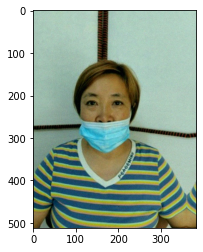

In [8]:
test = image_path[8]
image = cv2.imread(test)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [10]:
plt.imshow(tfms(image)['image'])

TypeError: Unexpected type <class 'numpy.ndarray'>

In [7]:
for num, path in enumerate(image_path):
    if num % 50 == 0:
        print(num + 1, '/', total)
    # plt.imshow(image)
    for i in range(2,6):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        splitted = path.split('.')
        filename = splitted[0] + str(i) + '.' + splitted[1]
        image_after = tf(image=image)['image']
        image_after = cv2.cvtColor(image_after, cv2.COLOR_RGB2BGR)
        cv2.imwrite(filename, image_after)

1 / 5400
51 / 5400
101 / 5400
151 / 5400
201 / 5400
251 / 5400
301 / 5400
351 / 5400
401 / 5400
451 / 5400
501 / 5400
551 / 5400
601 / 5400
651 / 5400
701 / 5400
751 / 5400
801 / 5400
851 / 5400
901 / 5400
951 / 5400
1001 / 5400
1051 / 5400
1101 / 5400
1151 / 5400
1201 / 5400
1251 / 5400
1301 / 5400
1351 / 5400
1401 / 5400
1451 / 5400
1501 / 5400
1551 / 5400
1601 / 5400
1651 / 5400
1701 / 5400
1751 / 5400
1801 / 5400
1851 / 5400
1901 / 5400
1951 / 5400
2001 / 5400
2051 / 5400
2101 / 5400
2151 / 5400
2201 / 5400
2251 / 5400
2301 / 5400
2351 / 5400
2401 / 5400
2451 / 5400
2501 / 5400
2551 / 5400
2601 / 5400
2651 / 5400
2701 / 5400
2751 / 5400
2801 / 5400
2851 / 5400
2901 / 5400
2951 / 5400
3001 / 5400
3051 / 5400
3101 / 5400
3151 / 5400
3201 / 5400
3251 / 5400
3301 / 5400
3351 / 5400
3401 / 5400
3451 / 5400
3501 / 5400
3551 / 5400
3601 / 5400
3651 / 5400
3701 / 5400
3751 / 5400
3801 / 5400
3851 / 5400
3901 / 5400
3951 / 5400
4001 / 5400
4051 / 5400
4101 / 5400
4151 / 5400
4201 / 5400
425